# Problem Statement: Predicting Customer Churn
* The data is centred on customer churn, the rate at which a commercial customer will leave the commercial platform
that they are currently a (paying) customer of a telecommunications company.

In [224]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Step 1: Reading and Understanding data

In [225]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [226]:
# Check number of rows and columns
df_train.shape

(4250, 20)

In [227]:
df_test.shape

(750, 20)

In [228]:
# Top 5 record
pd.set_option('display.max_columns', 85)
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [229]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [230]:
# Check the summary
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [231]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [232]:
# Statistic of numeric column
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [233]:
df_test.describe()

,id,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,375.50000,100.385333,8.454667,180.454933,100.721333,30.677920,203.258267,100.273333,17.277080,199.619467,100.370667,8.982827,10.294133,4.485333,2.779933,1.634667
std,216.65064,39.699029,14.123712,53.258337,19.718539,9.053756,52.185471,19.367535,4.435638,51.531351,19.185238,2.318920,2.770340,2.421901,0.747704,1.276207
min,1.00000,1.000000,0.000000,12.500000,39.000000,2.130000,31.200000,37.000000,2.650000,50.900000,12.000000,2.290000,0.000000,0.000000,0.000000,0.000000
25%,188.25000,74.000000,0.000000,146.625000,88.000000,24.925000,166.800000,87.000000,14.177500,164.475000,88.000000,7.402500,8.525000,3.000000,2.305000,1.000000
50%,375.50000,101.000000,0.000000,178.200000,101.000000,30.295000,203.350000,101.000000,17.285000,199.450000,100.500000,8.975000,10.300000,4.000000,2.780000,1.000000
75%,562.75000,126.000000,21.000000,215.975000,114.000000,36.715000,235.975000,113.000000,20.057500,234.800000,113.000000,10.565000,12.100000,6.000000,3.270000,2.000000
max,750.00000,238.000000,51.000000,350.800000,163.000000,59.640000,363.700000,164.000000,30.910000,364.300000,168.000000,16.390000,18.900000,19.000000,5.100000,6.000000


# Step 2: Data Cleaning

### 1. Checking missing value/treatment of missing value:-

In [234]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [235]:
df_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [236]:
df_train = df_train.drop('state',axis=1)

In [237]:
df_test = df_test.drop(['state','id'],axis=1)

### Observation :-
* Here no missing value in dataset.

### 2.checking outliers/treatment:-

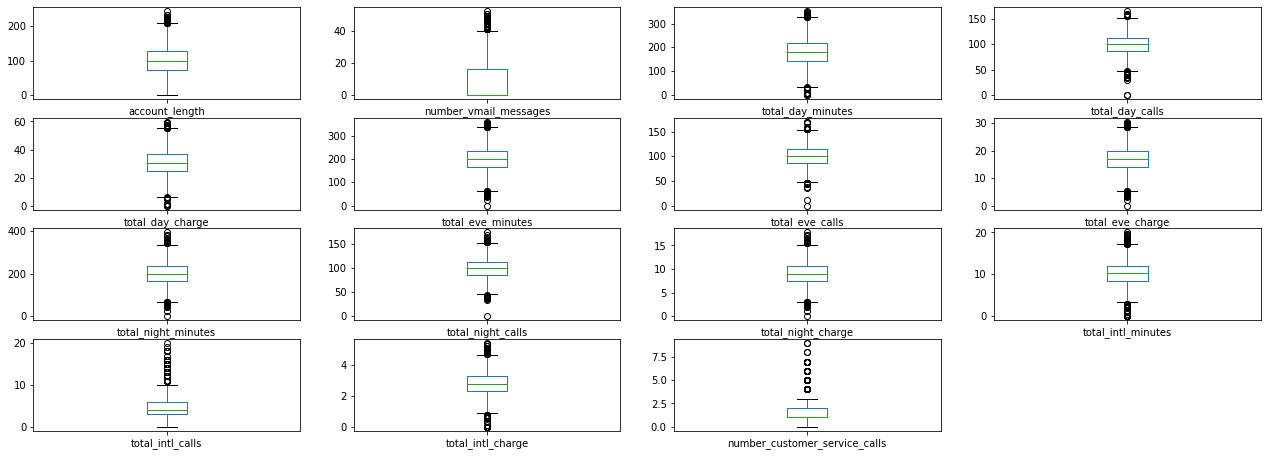

In [238]:
## checking outliers using boxplot:-

df_train.plot(kind='box', subplots=True, figsize=(22,20), layout=(10,4))
plt.show()

##### Next, we do capping to 99 percentile on numeric column of train dataframe :

In [239]:
# for numarical data
num_df = df_train.loc[:,df_train.dtypes != 'object']

In [240]:
def num(x):
    plt.figure(figsize=(6,6))
    plt.title(x)
    sns.boxplot(df_train[x])
    plt.show()
    return

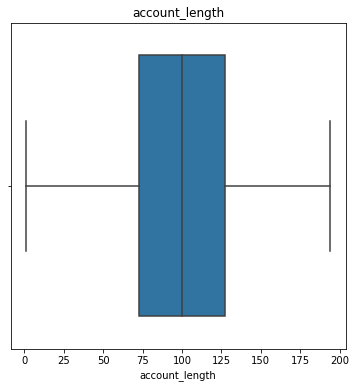

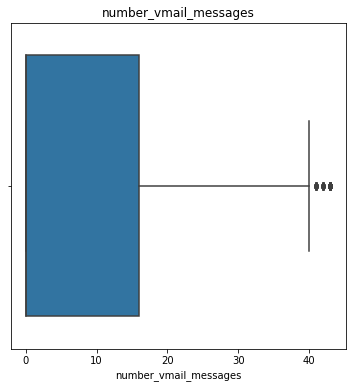

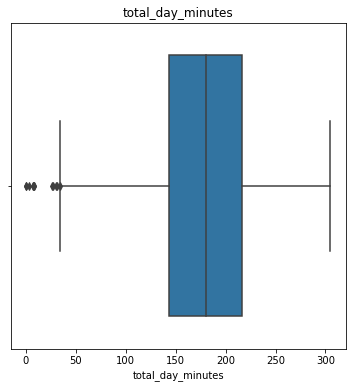

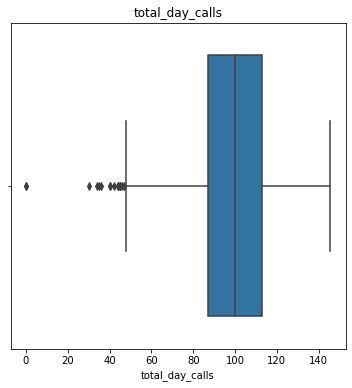

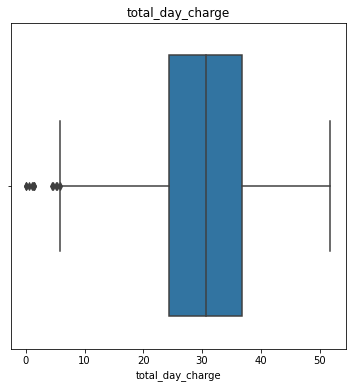

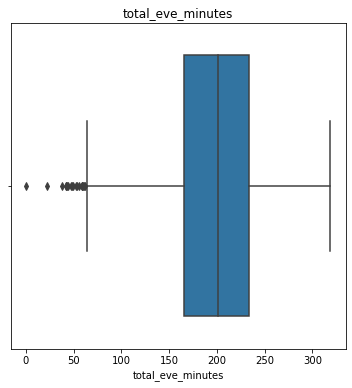

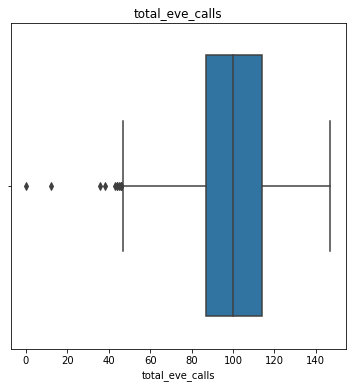

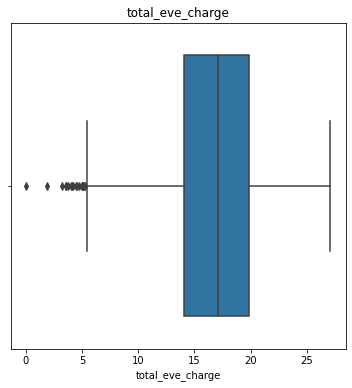

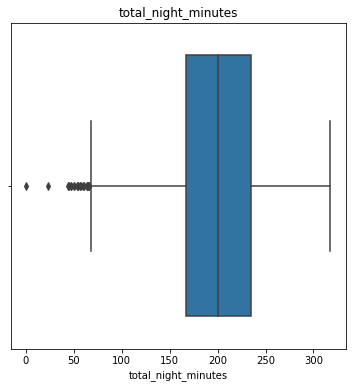

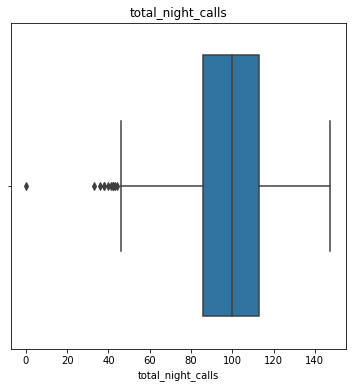

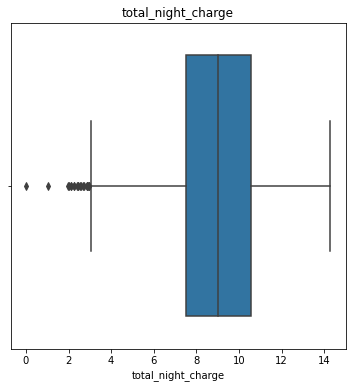

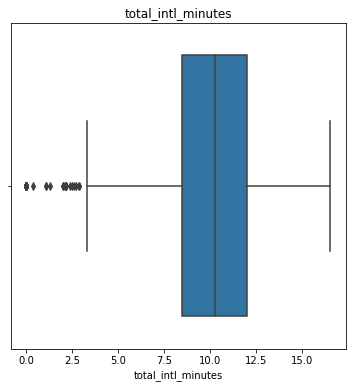

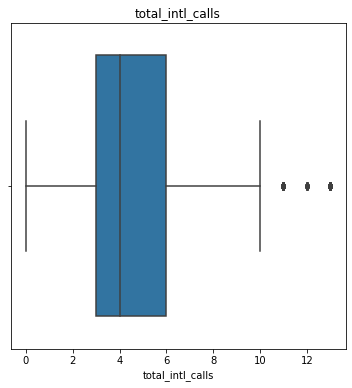

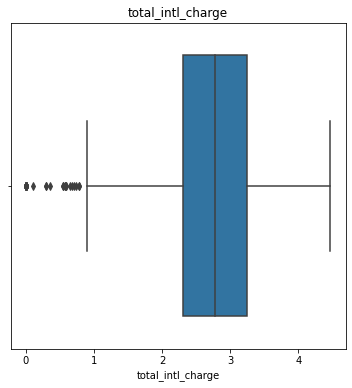

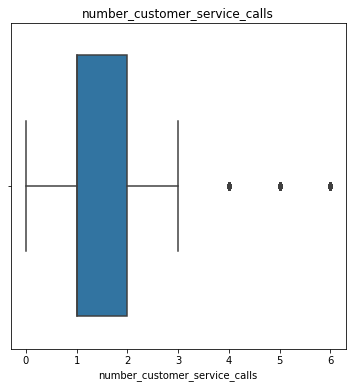

In [241]:
for x in num_df:
    q3,q1 = np.percentile(df_train[x],[75,25])
    q4= np.percentile(df_train[x],[99])
    df_train.loc[df_train[x] > q4[0], x] = q4[0]
    num(x)

# Step-3. Data analysis 

### Univariate Analysis 

In [333]:
df_col = list(df_train.columns)
df_col

['account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

In [334]:
df_col.remove('churn')
df_col

['account_length',
 'area_code',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

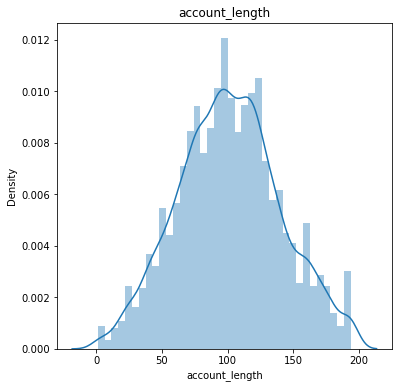

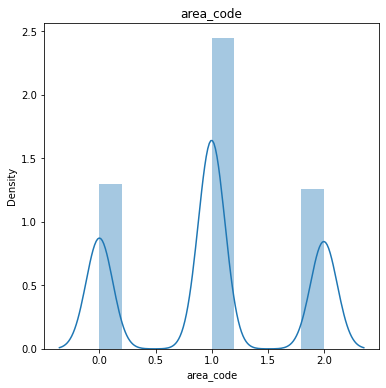

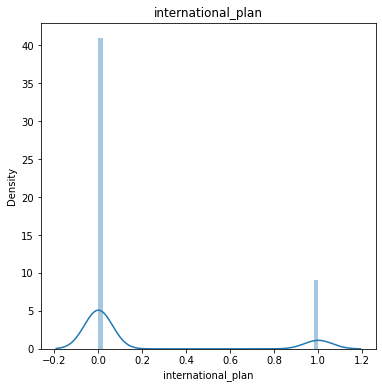

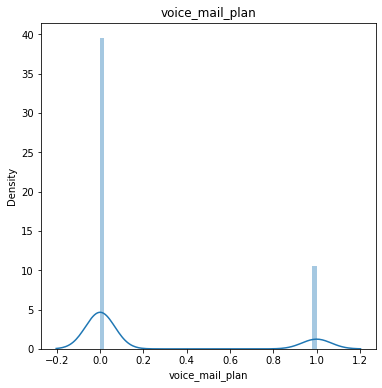

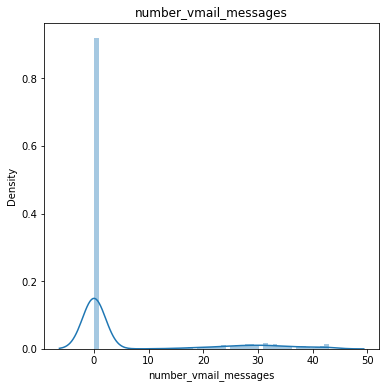

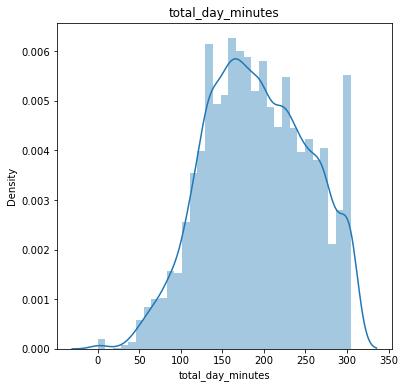

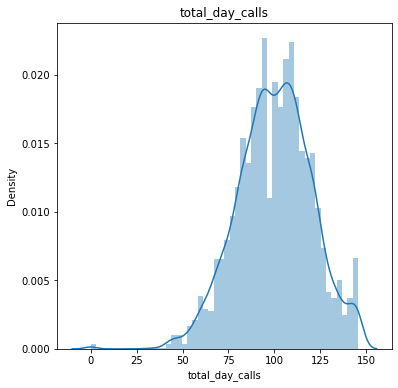

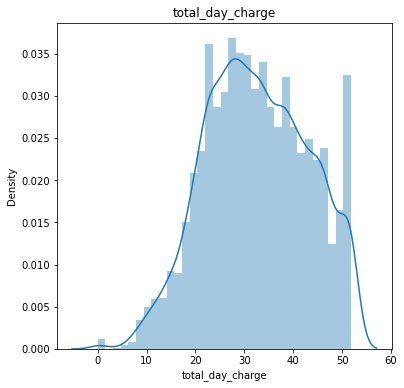

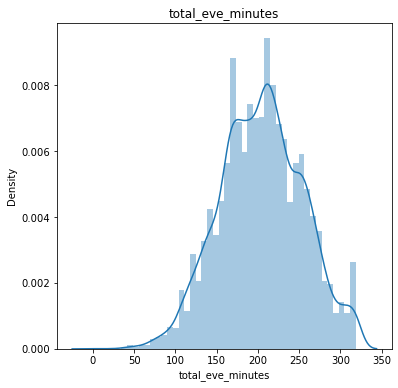

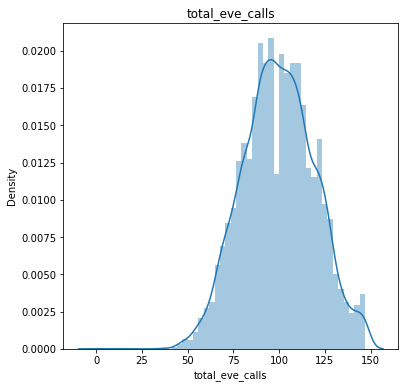

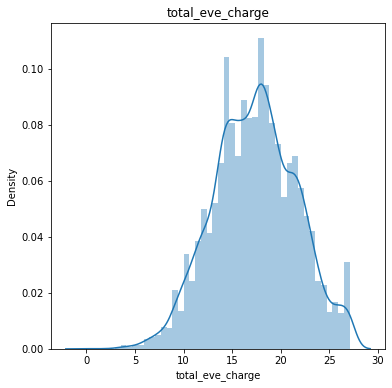

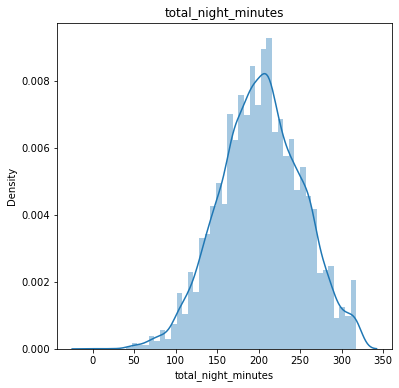

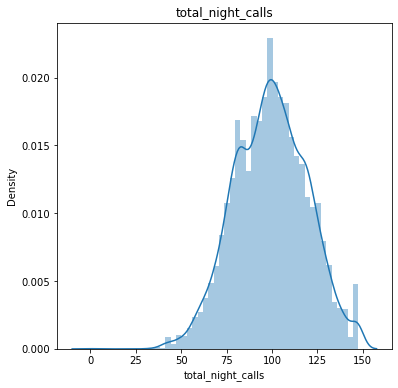

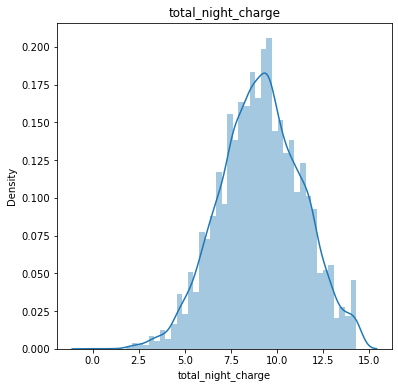

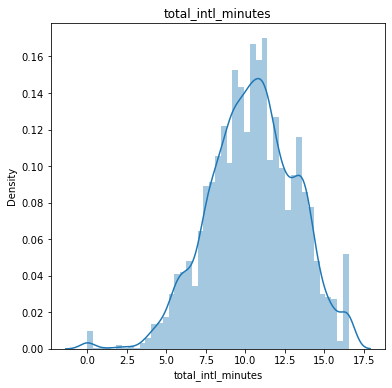

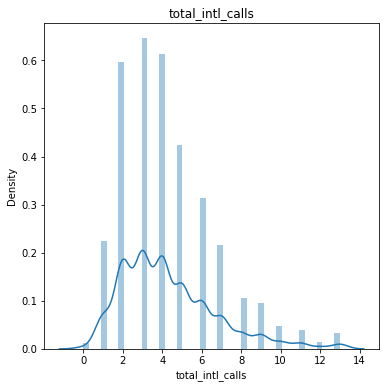

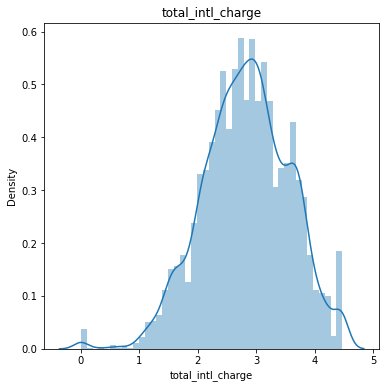

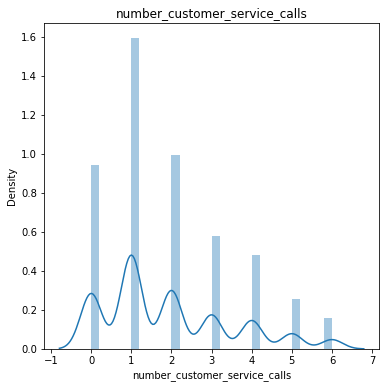

In [335]:
for num in df_col:
    plt.figure(figsize=(6,6))
    sns.distplot(df_train[num])
    plt.title(num)
    plt.show()

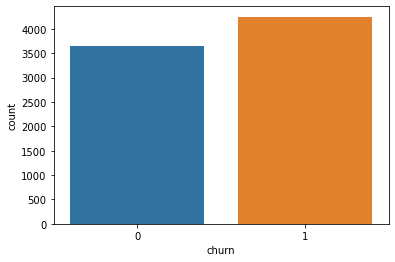

In [336]:
sns.countplot(x = df_train.churn)
plt.show()

### Multivariate Analysis :

<AxesSubplot:>

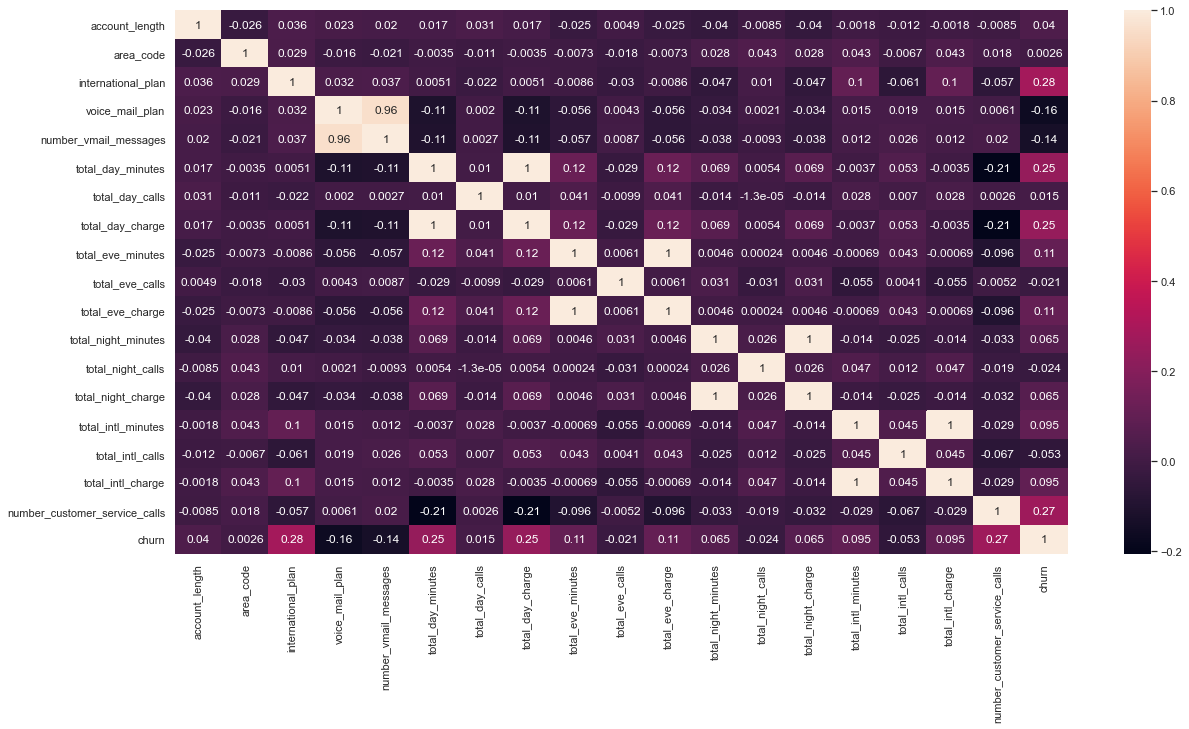

In [340]:
# Plot heatmap to check the correlation 
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df_train.corr(),annot=True)

#### Observation:
• Good Correction between number_vmail_messages and voice_mail_plan , total_day_charge and total_eve_minutes , total_eve_charge and total_night_minutes , total_night_charge and total_intl_minutes , total_intl_charge and total_intl_minutes.

# 4.Data Preparation

### Encoding

In [242]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [243]:
cat_col = ['area_code','international_plan','voice_mail_plan','churn']

In [244]:
for i in cat_col:
    df_train[i]= le.fit_transform(df_train[i])

In [245]:
df_train.head()

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107.0,1,0,1,26.0,161.6,123.0,27.47,195.500,103.0,16.6200,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0
1,137.0,1,0,0,0.0,243.4,114.0,41.38,121.200,110.0,10.3000,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0
2,84.0,0,1,0,0.0,299.4,71.0,50.90,61.900,88.0,5.2600,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0
3,75.0,1,1,0,0.0,166.7,113.0,28.34,148.300,122.0,12.6100,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0
4,121.0,2,0,1,24.0,218.2,88.0,37.09,318.651,108.0,27.0851,212.6,118.0,9.57,7.5,7.0,2.03,3.0,0


In [246]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()

### 2. Check if there is an imbalance in data. If there is an imbalance in data, resolve it.

In [247]:
from sklearn.utils import resample

In [248]:
#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['churn']==0)] 
df_minority = df_train[(df_train['churn']==1)] 

In [249]:
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4250, # to match majority class
                                 random_state=42)  # reproducible results

In [250]:
# Combine majority class with upsampled minority class
df_train = pd.concat([df_minority_upsampled, df_majority])

### Observation :-
* our target class has an imbalance. 
* So, we’ll try to upsample the data so that the minority class matches with the majority class.

## Train_Test_Split

In [251]:
## CREATE X and y
X = df_train.drop('churn',axis=1)
Y = df_train['churn']

In [252]:
#### Here we create TRAIN | VALIDATION | TEST  #########
from sklearn.model_selection import train_test_split

In [253]:
# 70% of data is training data, set aside other 30%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Scale data

In [254]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. Build a Logistic Regression classification model which will predict whether a customer is at risk to churn from the platform.

In [255]:
from sklearn.linear_model import LogisticRegression

In [256]:
lr_model = LogisticRegression()

In [257]:
# fit the model
lr_model.fit(X_train,y_train)

LogisticRegression()

In [258]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([0, 1, 1, ..., 1, 1, 1])

In [259]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

In [260]:
# Accuracy Score 
metrics.accuracy_score(y_pred_lr,y_test)

0.7697174188106284

In [261]:
# Confusion Matrix
confusion = confusion_matrix(y_pred_lr,y_test)
confusion

array([[ 789,  245],
       [ 301, 1036]])

In [262]:
from sklearn.metrics import classification_report

In [263]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1090
           1       0.77      0.81      0.79      1281

    accuracy                           0.77      2371
   macro avg       0.77      0.77      0.77      2371
weighted avg       0.77      0.77      0.77      2371



In [264]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [265]:
# Sensitivity
Sensitivity = TP / float(TP+FN)
Sensitivity

0.774869109947644

In [266]:
# Specificity
Specificity = TN / float(TN+FP)
Specificity

0.7630560928433269

### 4. Build Naive Bayes model which will predict whether a customer is at risk to churn from the platform.

In [267]:
from sklearn.naive_bayes import GaussianNB

In [268]:
gnb = GaussianNB(priors=None)

In [269]:
# fit the model
gnb.fit(X_train,y_train)

GaussianNB()

In [270]:
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

array([0, 1, 1, ..., 0, 1, 1])

In [271]:
# Accuracy Score 
metrics.accuracy_score(y_pred_gnb,y_test)

0.8059890341628005

In [272]:
# Confusion Matrix
confusion = confusion_matrix(y_pred_gnb,y_test)
confusion

array([[ 874,  244],
       [ 216, 1037]])

In [273]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1090
           1       0.83      0.81      0.82      1281

    accuracy                           0.81      2371
   macro avg       0.80      0.81      0.81      2371
weighted avg       0.81      0.81      0.81      2371



### 5. Build a K-nearest classifier which will predict whether a customer is at risk to churn from the platform.

In [274]:
from sklearn.neighbors import KNeighborsClassifier

In [275]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [276]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [277]:
y_pred_knn = knn_model.predict(X_test)

In [278]:
accuracy_score(y_test,y_pred_knn)

0.9595107549557149

In [279]:
confusion_matrix(y_test,y_pred_knn)

array([[ 999,   91],
       [   5, 1276]])

In [280]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.92      0.95      1090
           1       0.93      1.00      0.96      1281

    accuracy                           0.96      2371
   macro avg       0.96      0.96      0.96      2371
weighted avg       0.96      0.96      0.96      2371



### 6. Find optimal parameters for the algorithm through GridSearchCV and build SVC model which will predict whether a customer is at risk to churn from the platform. 

In [281]:
from sklearn.svm import SVC

In [282]:
model = SVC()

In [283]:
model.fit(X_train, y_train)

SVC()

In [284]:
y_pred_svc = model.predict(X_test)
y_pred_svc

array([0, 1, 1, ..., 0, 1, 1])

In [285]:
accuracy_score(y_test,y_pred_svc)

0.9046815689582455

In [286]:
confusion_matrix(y_test,y_pred_svc)

array([[ 977,  113],
       [ 113, 1168]])

In [287]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1090
           1       0.91      0.91      0.91      1281

    accuracy                           0.90      2371
   macro avg       0.90      0.90      0.90      2371
weighted avg       0.90      0.90      0.90      2371



###### Find best estimator for model using GridSearchCV

In [288]:
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}

In [289]:
grid = GridSearchCV(model,param_grid)

In [290]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [291]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [292]:
model = SVC(C=1 , kernel='rbf')

In [293]:
model.fit(X_train, y_train)

SVC(C=1)

In [294]:
y_pred_svc = model.predict(X_test)
y_pred_svc

array([0, 1, 1, ..., 0, 1, 1])

In [295]:
accuracy_score(y_test,y_pred_svc)

0.9046815689582455

In [296]:
confusion_matrix(y_test,y_pred_svc)

array([[ 977,  113],
       [ 113, 1168]])

In [297]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1090
           1       0.91      0.91      0.91      1281

    accuracy                           0.90      2371
   macro avg       0.90      0.90      0.90      2371
weighted avg       0.90      0.90      0.90      2371



### 7. Find optimal parameters for the algorithm through GridSearchCV and build a Decision tree which will predict whether a customer is at risk to churn from the platform. 

In [298]:
from sklearn.tree import DecisionTreeClassifier

In [299]:
dt = DecisionTreeClassifier()

In [300]:
# fit the model
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [301]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 1, ..., 0, 1, 1])

In [302]:
# Accuracy Score 
metrics.accuracy_score(y_test,y_pred_dt)

0.97089835512442

In [303]:
# Confusion Matrix
confusion_matrix(y_test,y_pred_dt)

array([[1024,   66],
       [   3, 1278]])

In [304]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1090
           1       0.95      1.00      0.97      1281

    accuracy                           0.97      2371
   macro avg       0.97      0.97      0.97      2371
weighted avg       0.97      0.97      0.97      2371



###### Find best estimator for model using GridSearchCV

In [305]:
from sklearn.model_selection import GridSearchCV

In [306]:
params = {'max_leaf_nodes': list(range(20, 50)), 'min_samples_split': [20, 30, 40, 50, 60]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=20), params, cv=3)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'max_leaf_nodes': [20, 21, 22, 23, 24, 25, 26, 27, 28,
                                            29, 30, 31, 32, 33, 34, 35, 36, 37,
                                            38, 39, 40, 41, 42, 43, 44, 45, 46,
                                            47, 48, 49],
                         'min_samples_split': [20, 30, 40, 50, 60]})

In [307]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=48, min_samples_split=30, random_state=20)

In [308]:
df = DecisionTreeClassifier(criterion='entropy',min_samples_split=30,
                           max_leaf_nodes=48,random_state=20)

In [309]:
dt = dt.fit(X_train,y_train)

In [310]:
y_pred_dt = dt.predict(X_test)

In [311]:
metrics.accuracy_score(y_test, y_pred_dt)

0.9692113032475749

### 8. Find optimal parameters for the algorithm through RandomSearchCV and build a Random which will predict whether a customer is at risk to churn from the platform. 

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
# Use 10 random trees
model = RandomForestClassifier()

In [314]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [315]:
y_pred_rf = model.predict(X_test)

In [316]:
confusion_matrix(y_test,y_pred_rf)

array([[1066,   24],
       [   0, 1281]])

In [317]:
metrics.accuracy_score(y_test, y_pred_rf)

0.9898776887389287

In [318]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1090
           1       0.98      1.00      0.99      1281

    accuracy                           0.99      2371
   macro avg       0.99      0.99      0.99      2371
weighted avg       0.99      0.99      0.99      2371



###### Find best estimator for model using GridSearchCV

In [319]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]

In [320]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             }

In [321]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [322]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200]})

In [323]:
grid.best_params_

{'bootstrap': False, 'max_features': 2, 'n_estimators': 128}

In [324]:
model = RandomForestClassifier(bootstrap=False , max_features=2)

In [325]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features=2)

In [326]:
y_pred_rf = model.predict(X_test)
y_pred_rf

array([0, 1, 1, ..., 0, 1, 1])

In [327]:
metrics.accuracy_score(y_test, y_pred_rf)

0.9907212146773513

### 9. Model Selection: Evaluate and compare performance of all the models to find the best model.

In [331]:
compare = pd.DataFrame({'Model':['Logistic Regression' ,'Naive Bayes' , 'K-nearest' , 'SVC',
                                'Decision Tree' , 'Random Forest Regression'],
                        'Accuracy':[accuracy_score(y_test,y_pred_lr)*100,accuracy_score(y_test,y_pred_gnb)*100,
                                   accuracy_score(y_test,y_pred_knn)*100,accuracy_score(y_test,y_pred_svc)*100,
                                   accuracy_score(y_test,y_pred_dt)*100,accuracy_score(y_test,y_pred_rf)*100]})

In [332]:
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Random Forest Regression,99.072121
4,Decision Tree,96.921130
2,K-nearest,95.951075
3,SVC,90.468157
1,Naive Bayes,80.598903
0,Logistic Regression,76.971742
